# Unsupervised Machine Learning

In unsupervised machine learning we do not predict the output. we just form a clusters.

# K-Means Clustering

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans   #importing kmeans clustering algorithm 

# Importing Dataset

In [2]:
data = pd.read_csv("Iris.csv")

In [3]:
data.head() #Checking the first 5 rows of iris dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail() #cheacking last 5 rows of iris dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
data.drop(['Id'],axis=1,inplace=True)    # We are dropping the id column because it has no use to form the cluster

In [6]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data.info()   # after performing info function on dataset we can identify that how many numerical variables and how many categorical valriale present in the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
data.describe()  # describe function is used for describing our dataset, means finding out mean,max,standard deviation, 25%,50% etc values, note that describe function works only on numerical values. 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
data.isnull().any() #cheking for is there any null values present in dataset.

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [10]:
data.Species.value_counts()   # checking for how much values present as per the species.

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Sepraring the values into independant variable

In [11]:
x = data.iloc[:,0:4].values   #seprating values into x varialbe 
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

# Data Visualization

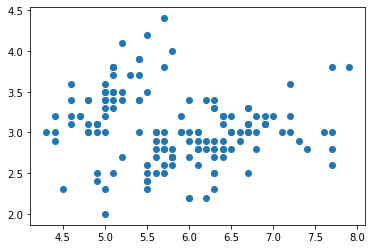

In [12]:
plt.scatter(x[:,0],x[:,1])

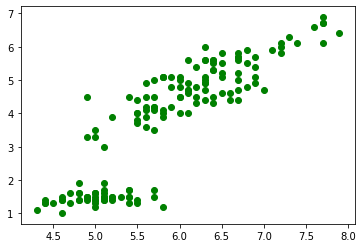

In [13]:
plt.scatter(x[:,0],x[:,2],color='g')

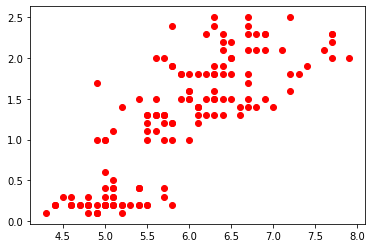

In [14]:
plt.scatter(x[:,0],x[:,3],color='r')

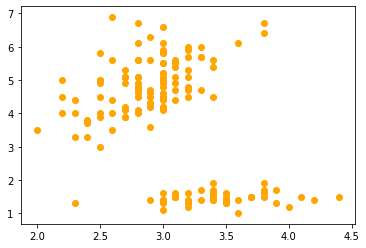

In [15]:
plt.scatter(x[:,1],x[:,2],color='orange')

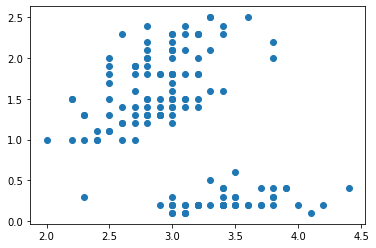

In [16]:
plt.scatter(x[:,1],x[:,3])

# K-Means

In [17]:
wcss = [] # Within cluster sum of squares, mainly used for fingding out the clusters. and K-Means is used for inialization 

Text(0, 0.5, 'WCSS')

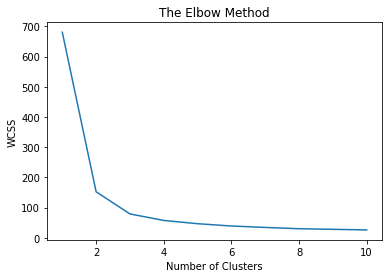

In [18]:
for i in range(1,11):   # we are taking the clusters from 1 to 10 and cheking one by one
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)  # and then we are passing the number of cluster here "i". kmeans is the object. to calculate wcss we have to place centroid, so kmeans++ help us to finding the position of centroid.
    kmeans.fit(x)      # fiting the kmeans algorithm with data for cluster 1 to 10
    wcss.append(kmeans.inertia_)         # to calcute wcss , attribute is inertia_. basically inertia is sum of squre distance within the clusters. our model has as low as value of inertia.
plt.plot(range(1,11),wcss) 
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

The above graph is Elbow graph used to find the value of K in K-Means, on x-axis there are number of clusters and on y-axis WCSS. 

Lower the value of inertia better the clustering is

whenever there is no large deviation then it is consider as your k value.

In [19]:
frame = pd.DataFrame({'Cluster':range(1,11),'wcss':wcss}) #here we have crated the dataframe with number of clusters and wcss cntain number of inertia values.

In [20]:
frame

,Cluster,wcss
0,1,680.824400
1,2,152.368706
2,3,78.940841
3,4,57.345409
4,5,46.535582
5,6,38.938740
6,7,34.190688
7,8,29.905374
8,9,27.927882
9,10,25.955497


here when there 1 cluester the inentia value is 680.824400. now when we increasing the clusters values then the inertia values is decreasing

In [21]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=0)
ymeans=kmeans.fit_predict(x)  # ymeans is nothing but cluster which are going to get.we use fit.predict() to fit the data aswell as getting prediction.
ymeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2,
       2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 3, 2, 2, 2,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 0, 2, 4, 0, 0, 4, 3, 4, 0, 4,
       0, 0, 0, 2, 0, 0, 0, 4, 4, 2, 0, 2, 4, 2, 0, 4, 2, 2, 0, 4, 4, 4,
       0, 2, 2, 4, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

in above the output which you got, we have total 5 clusters. so you got an array. the output is nothing but point belongs to clusters

In [22]:
x.shape  # to cheak the shape of x

(150, 4)

In [23]:
ymeans.shape 

(150,)

after forming all this you we get centroid positions, so below are the centroid posotions.

In [24]:
kmeans.cluster_centers_

array([[6.52916667, 3.05833333, 5.50833333, 2.1625    ],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.20769231, 2.85384615, 4.74615385, 1.56410256],
       [5.508     , 2.6       , 3.908     , 1.204     ],
       [7.475     , 3.125     , 6.3       , 2.05      ]])

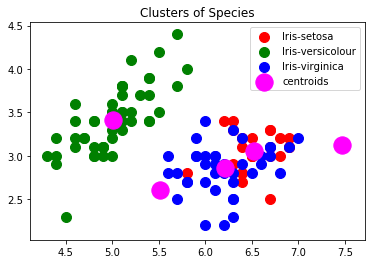

In [25]:
plt.scatter(x[ymeans==0,0],x[ymeans==0,1],s=100,color='r',label="Iris-setosa")  #here ymeans=0,0 repesent the where are cluster 0 we are taking its x co-ordinate and ymeans=0,1 means where as cluster 0 we are taking its y co-ordinates.
plt.scatter(x[ymeans==1,0],x[ymeans==1,1],s=100,color='g',label="Iris-versicolour")
plt.scatter(x[ymeans==2,0],x[ymeans==2,1],s=100,color='b',label="Iris-virginica")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,color="magenta",label="centroids")  # Plotting the centroids of the clusters 
plt.title('Clusters of Species')
plt.legend()

# Thank you